current K, 1
current K, 3
current K, 7
current K, 11
current K, 19


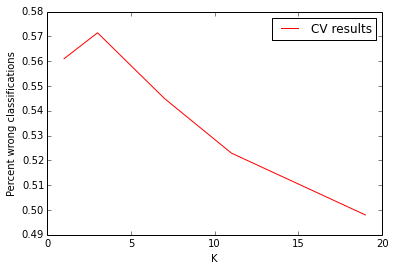

In [18]:
import urllib
import numpy as np
import scipy.spatial.distance as ssd
%matplotlib inline
import pylab as plt

def read_data():
    #read in red wine data
    urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
    with open('winequality-red.csv') as f:
        lines = (line for line in f)
        data = np.loadtxt(lines, delimiter=';', skiprows=1)
    return data

def knn(k, X_train, X_test, q_train):
    """ k-nearest neighbors """
 
    # initialize list to store predicted class
    pred_class = []
    # for each instance in data testing,
    # calculate distance in respect to data training
    for ii, di in enumerate(X_test):
        distances = []  # initialize list to store distance
        for ij, dj in enumerate(X_train):
            # calculate distances
            distances.append((calc_dist(di,dj), ij))
        # k-neighbors
        k_nn = sorted(distances)[:k]
        # predict the class for the instance
        pred_class.append(classify(k_nn, q_train))
 
    # return prediction class
    return pred_class
 
def calc_dist(di,dj):
    """ Distance calculation for every
        distance functions in use"""
    return ssd.euclidean(di,dj) # built-in Euclidean fn
 
def evaluate(result):
    """ Evaluate the prediction class"""
 
    # create eval result array to store evaluation result
    eval_result = np.zeros(2,int)
    for x in result:
        # increment the correct prediction by 1
        if x == 0:
            eval_result[0] += 1
        # increment the wrong prediction by 1
        else:
            eval_result[1] += 1
    # return evaluation result
    return eval_result

def classify(k_nn, q_train):
    """ Classify instance data test into class"""
 
    qlabel = []
    for dist, idx in k_nn:
        # retrieve label class and store into qlabel
        qlabel.append(q_train[idx])
 
    # return prediction class
    return np.argmax(np.bincount(qlabel))
 
def main():
    """ k-nearest neighbors classifier """
    # read dataset of red wine
    data = read_data()
    N = data.shape[0] #get tupple (numRows, numCols)
    #np.random.shuffle(data)
  
    Nfolds = 10
    sizes = np.tile(np.floor(N/10),(1,Nfolds))
    sizes[-1] = sizes[-1] + N - sizes.sum()
    c_sizes = np.hstack((0,np.cumsum(sizes)))
    X = np.copy(data[:,:11])# change to data here if you dont want to run the cv on independent test data
    t = np.copy(data[:,11])
    
    # initialize K
    K = [1,3,7,11,19]
    cv_loss = np.zeros((Nfolds, len(K)))
    
    for i in range(len(K)):
        for fold in range(Nfolds):
            X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
            X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)

            t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
            t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
            
            #print "k-NN classification results for red wine data set:"
            #print
            #print "    Number of correct / wrong classified test records"
            #print "k  | Euclidean dist |"
    
            # classification result for each distance function
            results = []
            # predict the data test into class
            pred_class = knn(K[i], X_train, X_fold, t_train)
            # evaluate the predicted result
            eval_result = evaluate(pred_class-t_fold)
            # assign the evaluated result into classification result
            results.append(eval_result[0])
            results.append(eval_result[1])

            # print the classification result into the screen
            # print K[i], " |     ", results[0], "/", results[1]
            cv_loss[fold,i] = float(results[1])/float(results[0]+results[1])
            results = []
        print "current K,",K[i]
    
    plt.plot(K,cv_loss.mean(axis=0),'r-',label="CV results")
    plt.legend()
    plt.xlabel('K')
    plt.ylabel('Percent wrong classifications')

main()